In [1]:
import matplotlib.pyplot as plt 
import numpy as np


def integrate_and_fire(I_in,E,Rm,tau_m,Vthr_spike,Vreset,t_ref,dt):
    # function to implement an integrate and fire neuron

    # initial computations
    t_range = np.arange(0, 500, dt)

    # init voltage
    V_t = np.zeros(len(t_range))
    V_t[0] = E

    # Prepare injected current
    # set first 100ms and last 100ms as Iinj = 0
    I_inj = I_in * np.ones(len(t_range))
    I_inj[0:int(100/dt)] = 0
    I_inj[int(400/dt):int(500/dt)] = 0

    refract_t = 0. # initialize refract period
    count_spks = []
    # loop
    for ii in range(1,len(t_range)):

        if refract_t>0:
            V_t[ii-1] = Vreset
            refract_t = refract_t - 1 
        elif  V_t[ii-1] >= Vthr_spike:  
            V_t[ii-1] = Vreset
            count_spks.append(ii-1)
            refract_t = t_ref / dt 


        # increment membran potential (leaky integrate and fire equation)
        dv = (E - V_t[ii-1] + (I_inj[ii-1]*Rm)) * (dt / tau_m)
        V_t[ii] = V_t[ii-1]+dv


    return   V_t, count_spks,t_range


/var/folders/cx/cs17d2nd74l5j24x969_flvr0000gn/T/ipykernel_40221/2969142433.py:24: RuntimeWarning: invalid value encountered in log
  fr_c.append(((tau_m * np.log(num/denom))**-1)*1000)
/var/folders/cx/cs17d2nd74l5j24x969_flvr0000gn/T/ipykernel_40221/2969142433.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  fr_c.append(((tau_m * np.log(num/denom))**-1)*1000)


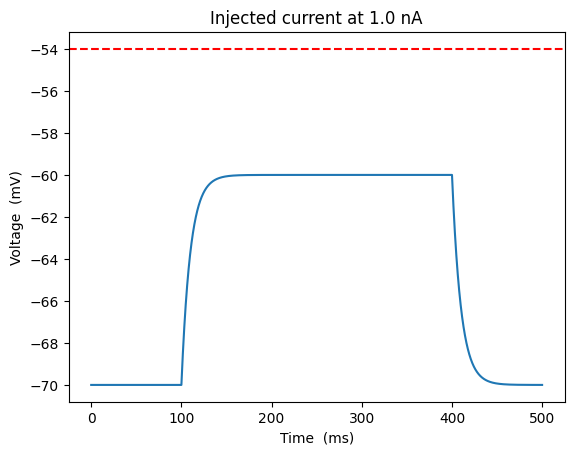

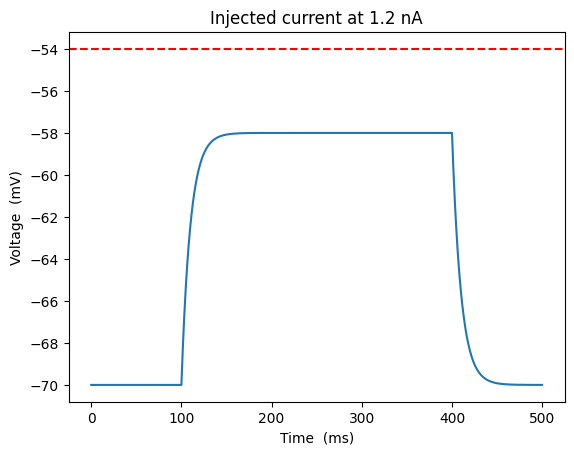

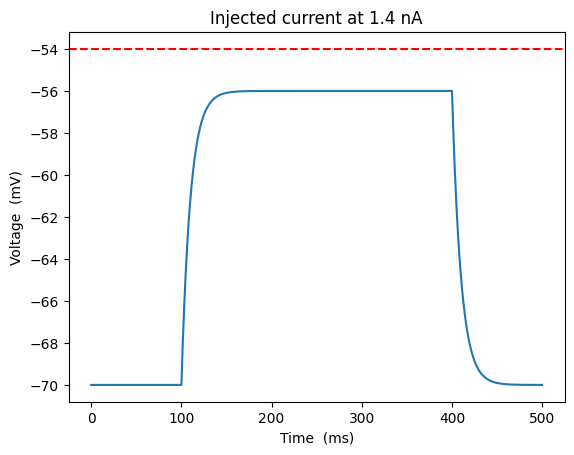

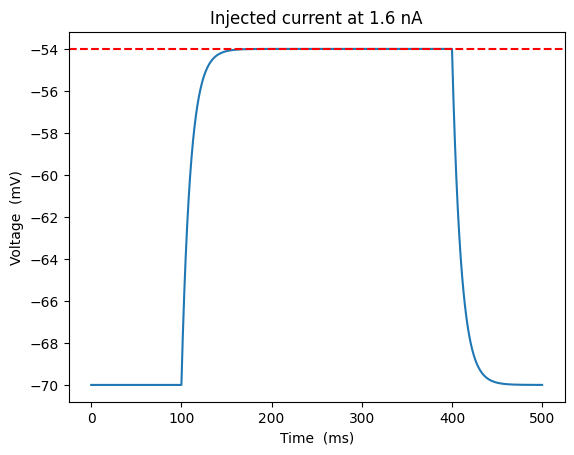

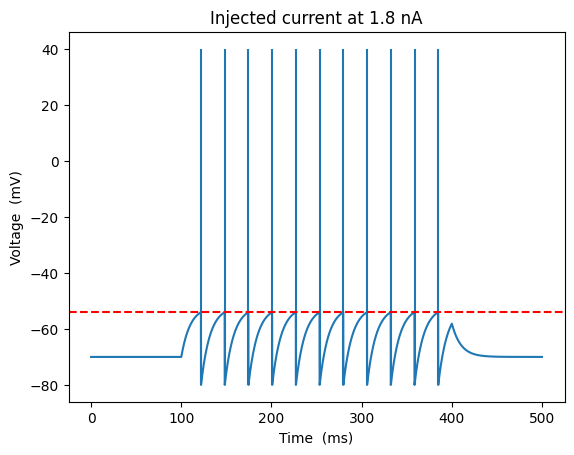

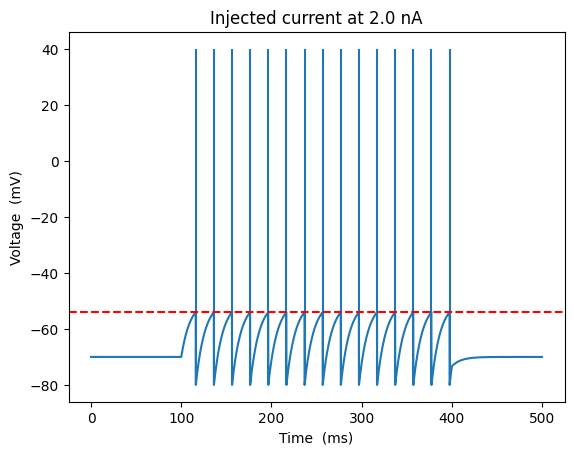

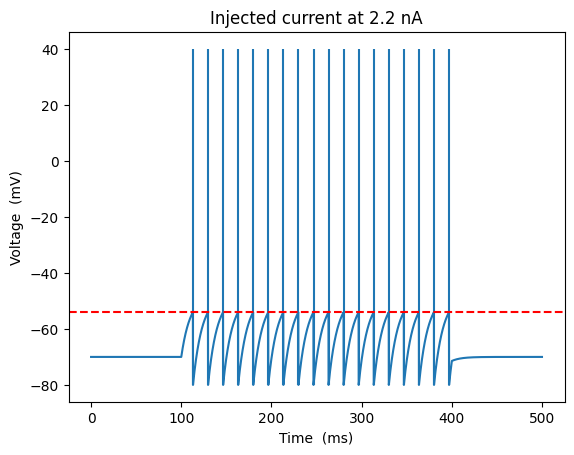

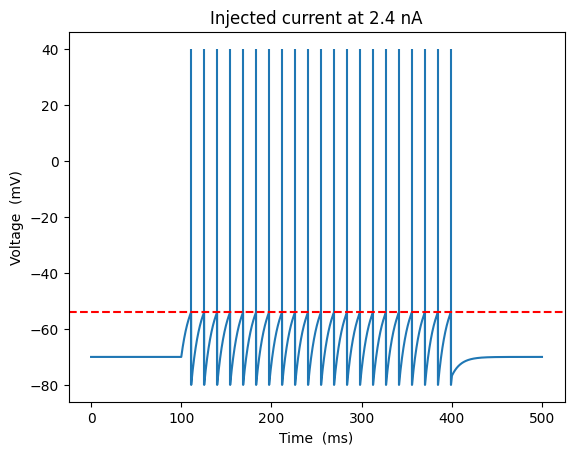

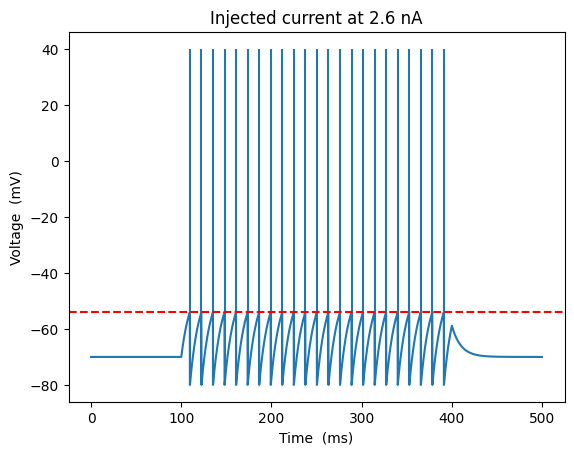

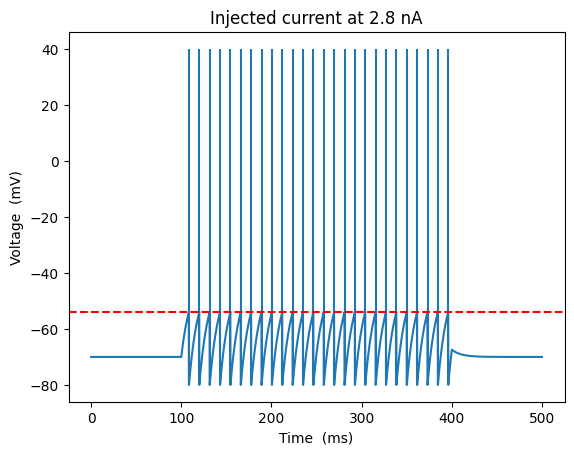

In [2]:
# Given data
I = np.arange(1,3,0.2) #nA

fr_m = []
fr_c = []

for I_in in I:
    E = -70 #mV
    Rm = 10 #MOhm
    tau_m = 10 #ms
    Vthr_spike = -54 #mV
    Vreset = -80 #mV
    t_ref = 0#2 #ms, assume as refractory period
    dt = 0.1

    V_t,count_spks,t_range = integrate_and_fire(I_in,E,Rm,tau_m,Vthr_spike,Vreset,t_ref,dt)

    # get firing rate from the model
    fr_m.append((len(count_spks)/300)*1000)

    # compute
    num =  (Rm*I_in)+E-Vreset 
    denom = (Rm*I_in)+E-Vthr_spike
    fr_c.append(((tau_m * np.log(num/denom))**-1)*1000)

    # print results
    #print(f'Firing rate obtained from the model is: {round(fr_m,3)} spikes/s')
    #print(f'Firing rate obtained from the computation is: {round(fr_c,3)} spikes/s')

    # Display voltage and spikes:
    plt.figure()
    plt.plot(t_range,V_t)
    for jj in count_spks:
        plt.vlines(jj*dt, ymin = -80, ymax = 40)
    plt.axhline(Vthr_spike,color='red', linestyle='--')    
    plt.xlabel('Time  (ms)')  
    plt.ylabel('Voltage  (mV)')  
    plt.title(f'Injected current at {round(I_in,2)} nA')  
    
    # save figs
   

    

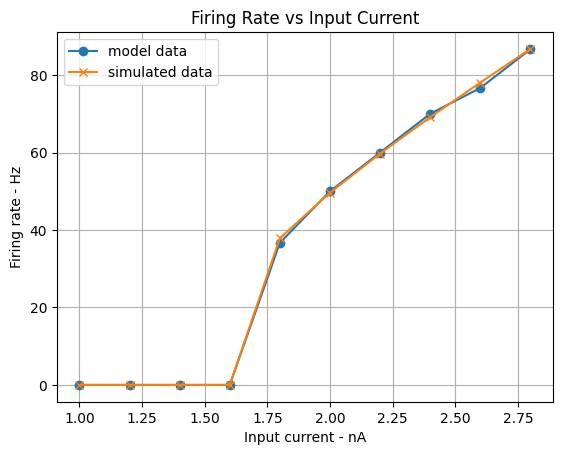

In [ ]:
# Display firing rate

fr_c = np.nan_to_num(fr_c, nan=0)

plt.figure()
plt.plot(I,fr_m,'o-', label = 'model data')
plt.plot(I,fr_c,'x-', label = 'simulated data')
plt.xlabel('Input current (nA)')
plt.ylabel('Firing rate (Hz)')
plt.title('Firing Rate vs Input Current')
plt.grid()
plt.legend()